In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../src/")

In [2]:
import matplotsoccer as mps
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [3]:
data = "../data/spadl-v2.hdf"
games = pd.read_hdf(data,key="games")
epl16 = games[(games.competition_id == 8) & (games.season_id == 2016)]
epl16[:5]

def get_actions(games, hdf_url):
    actions = []
    for game in tqdm(list(games.itertuples())):
        a = pd.read_hdf(hdf_url, key="actions/" + str(game.id))
        a["left_to_right"] = a["team_id"] == game.home_team_id
        actions.append(a)
    actions = pd.concat(actions)

    #actions = always_ltr(actions)
    return actions


def always_ltr(actions):
    away_idx = ~actions.left_to_right
    actions.loc[away_idx, "start_x"] = 105 - actions[away_idx].start_x.values
    actions.loc[away_idx, "start_y"] = 68 - actions[away_idx].start_y.values
    actions.loc[away_idx, "end_x"] = 105 - actions[away_idx].end_x.values
    actions.loc[away_idx, "end_y"] = 68 - actions[away_idx].end_y.values
    return actions

actions = get_actions(epl16,data)

actiontypes = pd.read_hdf(data, key="actiontypes")
actiontypes.columns = ["type_id","type_name"]
actions = actions.merge(actiontypes, on="type_id")

players = pd.read_hdf(data,key="players")
actions = actions.merge(players,left_on="player_id",right_on="id")

teams = pd.read_hdf(data,key="teams")
actions = actions.merge(teams,left_on="team_id",right_on="id")

actions = actions.sort_values(["game_id","period_id","time_seconds","timestamp"])

actions.columns

/home/tomd/software/miniconda3/envs/soccer/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
100%|██████████| 380/380 [00:06<00:00, 61.01it/s]


Index(['game_id', 'period_id', 'time_seconds', 'timestamp', 'team_id',
       'player_id', 'start_x', 'start_y', 'end_x', 'end_y', 'bodypart',
       'type_id', 'result', 'left_to_right', 'type_name', 'id_x', 'first_name',
       'last_name', 'soccer_name', 'birthday', 'nation_id', 'id_y',
       'full_name', 'short_name', 'abbreviation'],
      dtype='object')

In [ ]:
player_actions = actions[actions.last_name.str.contains("Kompany")].copy()
set(player_actions.soccer_name)
player_actions = always_ltr(player_actions)
x,y = player_actions.start_x, player_actions.start_y

# Field

In [ ]:
f = mps.field()
f = mps.field(color="green",figsize=10)

# Heatmap

In [ ]:
ax = mps.field(show=False)
ax.scatter(x,y,s=2); plt.show()

matrix = mps.count(x,y,n=20,m=20)
hm = mps.heatmap(matrix)

In [ ]:
start = 499605
delta = 40
phase = actions[start:start+delta].copy()
phase["team"] = phase.full_name
phase["player"] = phase.soccer_name
phase = phase[["team","player","time_seconds","type_name","result","start_x","start_y","end_x","end_y"]]

In [ ]:
phase[0-5:0+1]

# Actions

<IPython.core.display.Javascript object>


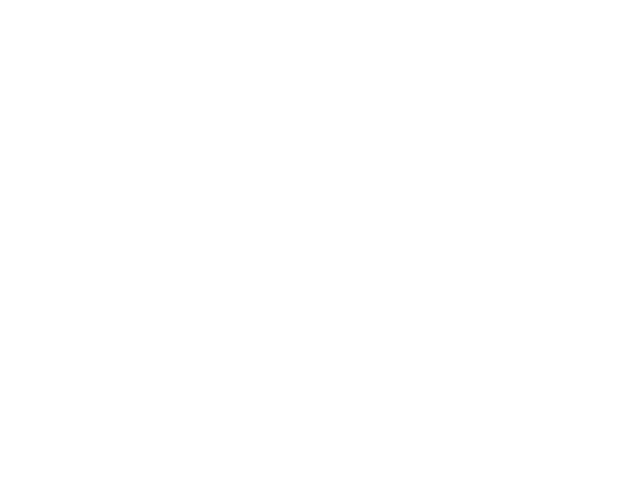

In [4]:
%matplotlib nbagg
#import matplotlib.animation as animation 
from matplotlib import animation
#from IPython.display import HTML

def animate(i):
    return mps.actions(phase[max(i-5,0):i+3],figsize = 8),

fig = plt.figure()
anim = animation.FuncAnimation(fig, animate,
                               frames=2, interval=20, blit=True)

<IPython.core.display.Javascript object>


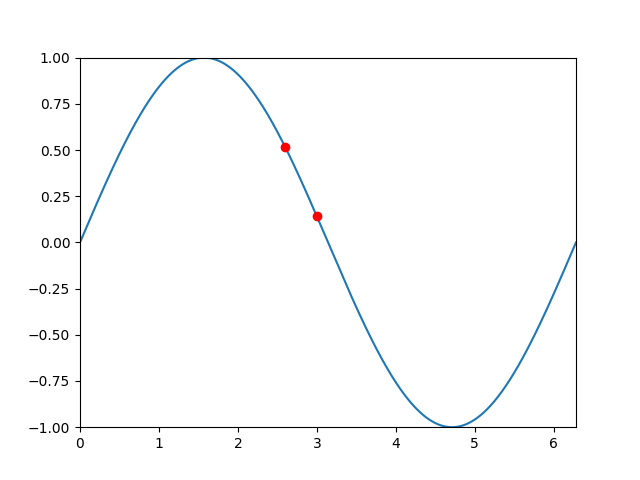

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
s = np.sin(t)
l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), \
                                      interval=10, blit=True, repeat=True)

plt.show()